# Non-Farm Payroll Analysis, Tables B-1 and A-2

In [484]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [485]:
#Get Non-farm Payroll Table B-1 from the Bureau of Labor Statistics
NFP_Table_B1 = pd.read_html('https://www.bls.gov/news.release/empsit.t17.htm')

#Get the actual Dataframe from a list of Dataframes and remove the 2 last rows (footnotes) and empty rows, join the multindex into a single index and drop columns that will not be used and convert to float
NFP_Table_B1 = (NFP_Table_B1[0].iloc[:-2, :]).dropna().set_index("Industry")
NFP_Table_B1.index = NFP_Table_B1.index.map('_'.join)
NFP_Table_B1 = NFP_Table_B1.drop(NFP_Table_B1.columns[[0,1,2,3,4]],1).droplevel(level=0, axis=1).astype(float)

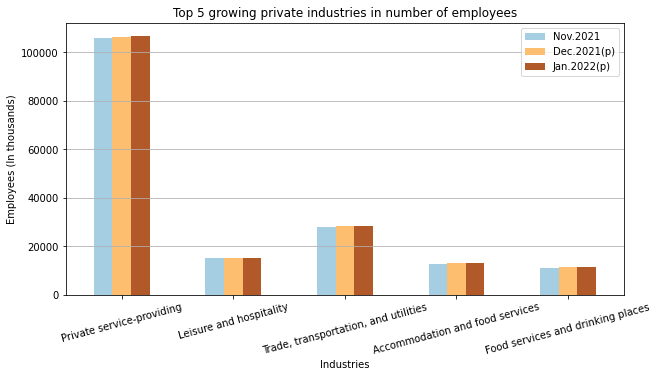

In [486]:
#Get the N(5) best performing industries in absolute terms from the private sector
NFP_Table_B1_WinAbs = NFP_Table_B1.iloc[2:-10,:].nlargest(n=5, columns=(NFP_Table_B1.columns[-1]))

NFP_Table_B1_WinAbs.plot(kind="bar", y=[0,1,2], figsize=(10, 5), colormap="Paired")

plt.title("Top 5 growing private industries in number of employees")
plt.xlabel("Industries")
plt.tick_params(axis='x', rotation=15)
plt.ylabel("Employees (In thousands)")
plt.grid(axis='y')
plt.legend()
#plt.show()
plt.savefig('images/WinAbs.png', bbox_inches='tight', facecolor='white')

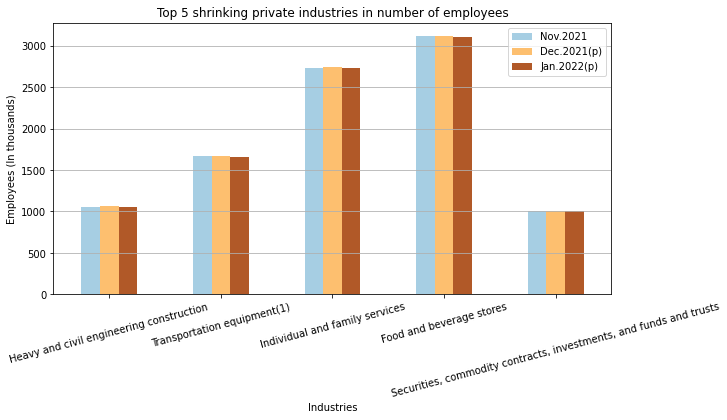

In [487]:
#Get the N(5) worst performing industries in absolute terms from the private sector
NFP_Table_B1_LosAbs = NFP_Table_B1.iloc[2:-10,:].nsmallest(n=5, columns=(NFP_Table_B1.columns[-1]))
NFP_Table_B1_LosAbs.plot(kind="bar", y=[0,1,2], figsize=(10, 5), colormap="Paired")
plt.title("Top 5 shrinking private industries in number of employees")
plt.ylabel("Employees (In thousands)")
plt.tick_params(axis='x', rotation=15)
plt.xlabel("Industries")
plt.grid(axis='y')
plt.legend()
#plt.show()
plt.savefig('images/LosAbs.png', bbox_inches='tight', facecolor='white')

In [488]:
#Insert 2 new columns with the % change between months
NFP_Table_B1['Nov.2021 - Dec.2021 (%)'] = ((NFP_Table_B1.iloc[:,1] - NFP_Table_B1.iloc[:,0]) / NFP_Table_B1.iloc[:,0]) * 100
NFP_Table_B1['Dec.2021 - Jan.2022 (%)'] = ((NFP_Table_B1.iloc[:,2] - NFP_Table_B1.iloc[:,1]) / NFP_Table_B1.iloc[:,1]) * 100

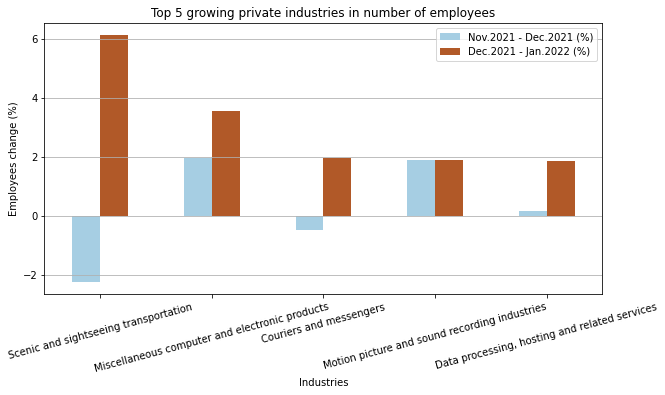

In [489]:
#Get the N(5) best performing industries in % terms from the private sector
NFP_Table_B1_WinPct = NFP_Table_B1.iloc[2:-10,:].nlargest(n=5, columns=(NFP_Table_B1.columns[-1]))

NFP_Table_B1_WinPct.plot(kind="bar", y=[-2,-1], figsize=(10, 5), colormap="Paired")

plt.title("Top 5 growing private industries in number of employees")
plt.xlabel("Industries")
plt.tick_params(axis='x', rotation=15)
plt.ylabel("Employees change (%)")
plt.grid(axis='y')
plt.legend()
#plt.show()
plt.savefig('images/WinPerc.png', bbox_inches='tight', facecolor='white')

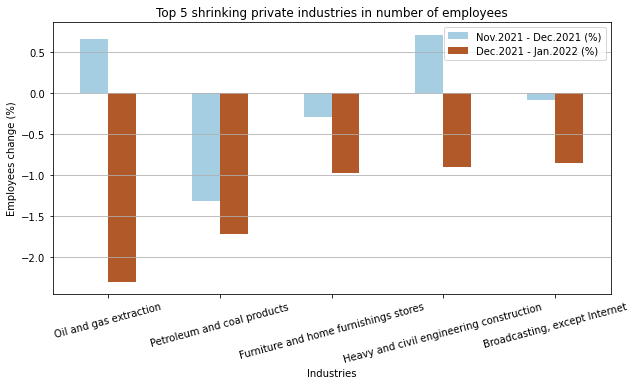

In [490]:
#Get the N(5) worst performing industries in % terms from the private sector
NFP_Table_B1_LosPct = NFP_Table_B1.iloc[2:-10,:].nsmallest(n=5, columns=(NFP_Table_B1.columns[-1]))

NFP_Table_B1_LosPct.plot(kind="bar", y=[-2,-1], figsize=(10, 5), colormap="Paired")

plt.title("Top 5 shrinking private industries in number of employees")
plt.xlabel("Industries")
plt.tick_params(axis='x', rotation=15)
plt.ylabel("Employees change (%)")
plt.grid(axis='y')
plt.legend()
#plt.show()
plt.savefig('images/LosPer.png', bbox_inches='tight', facecolor='white')

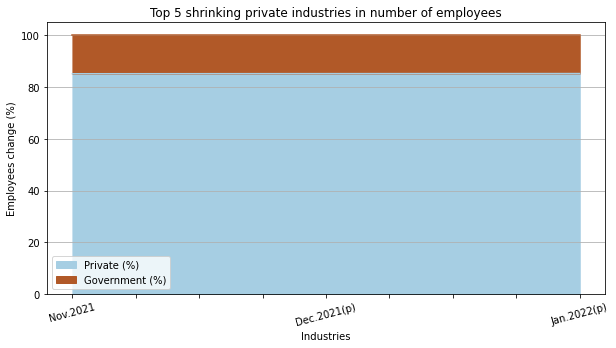

In [491]:
#Calculate the % change in Government jobs versus private jobs
NFP_Table_B1_PvtGov = NFP_Table_B1.iloc[[1,-10],0:3].transpose()
NFP_Table_B1_PvtGov['Private (%)'] = (NFP_Table_B1_PvtGov.iloc[:,0] *100) / (NFP_Table_B1_PvtGov.iloc[:,0] + NFP_Table_B1_PvtGov.iloc[:,1])
NFP_Table_B1_PvtGov['Government (%)'] = (NFP_Table_B1_PvtGov.iloc[:,1] *100) / (NFP_Table_B1_PvtGov.iloc[:,0] + NFP_Table_B1_PvtGov.iloc[:,1])

NFP_Table_B1_PvtGov.plot(kind="area",y=[2,3], figsize=(10, 5), colormap="Paired")

plt.title("Top 5 shrinking private industries in number of employees")
plt.xlabel("Industries")
plt.tick_params(axis='x', rotation=15)
plt.ylabel("Employees change (%)")
plt.grid(axis='y')
plt.legend()
#plt.show()
plt.savefig('images/PvtGov.png', bbox_inches='tight', facecolor='white')

In [492]:
#Get Non-farm Payroll Table A-2 from the Bureau of Labor Statistics
NFP_Table_A2 = pd.read_html('https://www.bls.gov/news.release/empsit.t02.htm')

#Get the actual Dataframe from a list of Dataframes and remove the 2 last rows (footnotes) and empty rows, join the multindex into a single index and drop columns that will not be used and convert to float
NFP_Table_A2 = (NFP_Table_A2[0].iloc[:-2, :]).fillna("0").set_index("Employment status, race, sex, and age")
NFP_Table_A2.index = NFP_Table_A2.index.map('_'.join)
NFP_Table_A2 = NFP_Table_A2.drop(NFP_Table_A2.columns[[0,1,2,3]],1).droplevel(level=0, axis=1).astype(float)

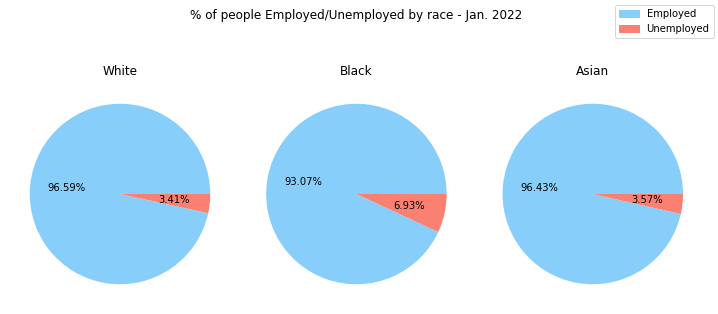

In [493]:
#Select the amount of employed and unemployed workes by race and plot in pie charts
NFP_Table_A2_White = NFP_Table_A2.iloc[:9,-1:].loc[['Employed','Unemployed']].transpose()
NFP_Table_A2_Black = NFP_Table_A2.iloc[31:40:,-1:].loc[['Employed','Unemployed']].transpose()
NFP_Table_A2_Asian = NFP_Table_A2.iloc[62:,-1:].loc[['Employed','Unemployed']].transpose()

fig, axs = plt.subplots(1,3, figsize=(10, 5))
fig.set_facecolor('white')
Employed_Patch = mpatches.Patch(color='lightskyblue', label='Employed')
Unemployed_Patch = mpatches.Patch(color='salmon', label='Unemployed')
fig.legend(handles=[Employed_Patch, Unemployed_Patch])
fig.suptitle("% of people Employed/Unemployed by race - Jan. 2022")

NFP_Table_A2_White.iloc[0].plot(ax=axs[0], autopct='%1.2f%%', kind="pie", label='', labels=["",""], colors=['lightskyblue','salmon'], title='White')
NFP_Table_A2_Black.iloc[0].plot(ax=axs[1], autopct='%1.2f%%', kind="pie", label='', labels=["",""], colors=['lightskyblue','salmon'], title='Black')
NFP_Table_A2_Asian.iloc[0].plot(ax=axs[2], autopct='%1.2f%%', kind="pie", label='', labels=["",""], colors=['lightskyblue','salmon'], title='Asian')
plt.tight_layout()
#plt.show()
plt.savefig('images/EmpPie.png', bbox_inches='tight', facecolor='white')

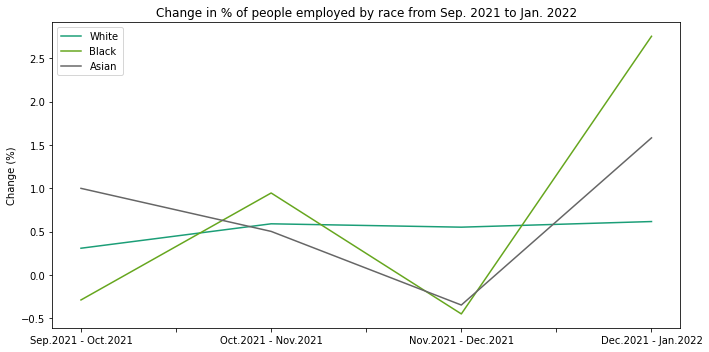

In [495]:
#Get the % change for employeed(by race) in the last 4 months
NFP_Table_A2_White = NFP_Table_A2.iloc[:9,:].loc['Employed']
NFP_Table_A2_Black = NFP_Table_A2.iloc[31:40:,:].loc['Employed']
NFP_Table_A2_Asian = NFP_Table_A2.iloc[62:,:].loc['Employed']

NFP_Table_A2_Per = pd.DataFrame({'White': NFP_Table_A2_White, 'Black': NFP_Table_A2_Black, 'Asian': NFP_Table_A2_Asian}).transpose()

NFP_Table_A2_Per['Sep.2021 - Oct.2021'] = ((NFP_Table_A2_Per.iloc[:,1] - NFP_Table_A2_Per.iloc[:,0]) / NFP_Table_A2_Per.iloc[:,1]) * 100
NFP_Table_A2_Per['Oct.2021 - Nov.2021'] = ((NFP_Table_A2_Per.iloc[:,2] - NFP_Table_A2_Per.iloc[:,1]) / NFP_Table_A2_Per.iloc[:,2]) * 100
NFP_Table_A2_Per['Nov.2021 - Dec.2021'] = ((NFP_Table_A2_Per.iloc[:,3] - NFP_Table_A2_Per.iloc[:,2]) / NFP_Table_A2_Per.iloc[:,3]) * 100
NFP_Table_A2_Per['Dec.2021 - Jan.2022'] = ((NFP_Table_A2_Per.iloc[:,4] - NFP_Table_A2_Per.iloc[:,3]) / NFP_Table_A2_Per.iloc[:,4]) * 100

#print(NFP_Table_A2_Per.transpose())
NFP_Table_A2_Per.T.iloc[5:].plot(kind="line", figsize=(10, 5), colormap="Dark2")
plt.title("Change in % of people employed by race from Sep. 2021 to Jan. 2022")
plt.ylabel("Change (%)")
plt.tight_layout()
plt.show()
#plt.savefig('images/EmpChg.png', bbox_inches='tight', facecolor='white')